# Hierarchical Clustering

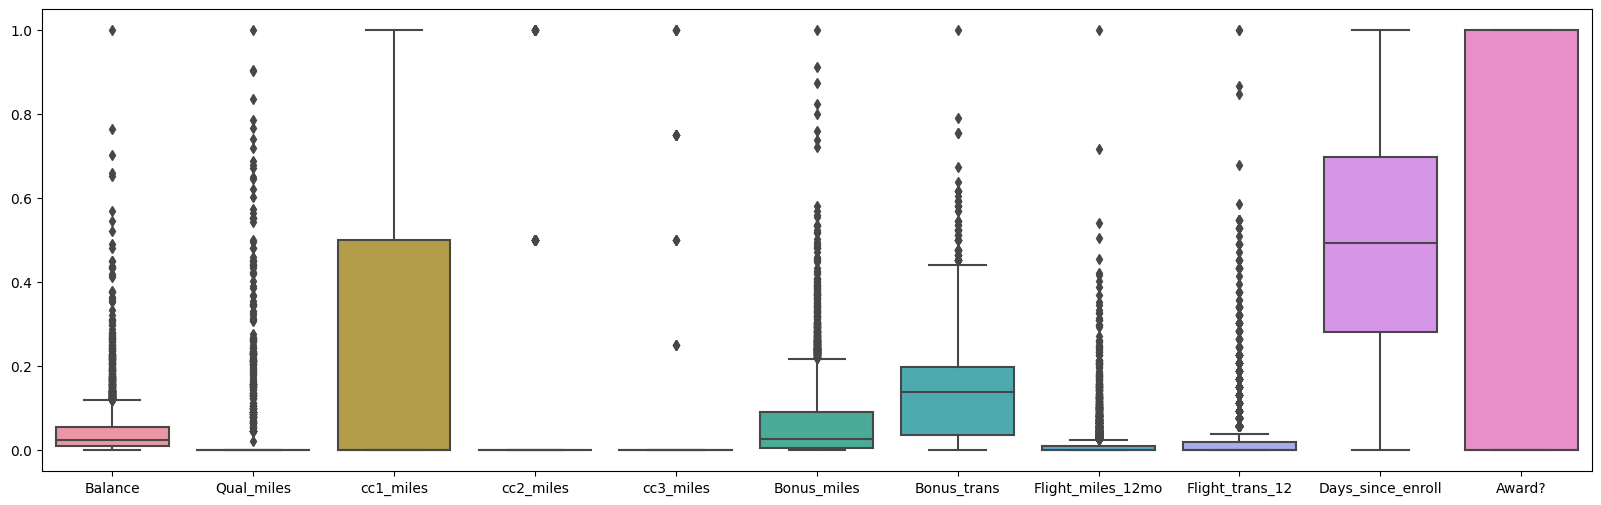

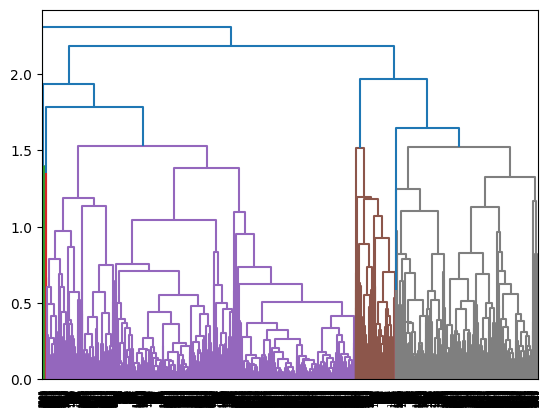

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


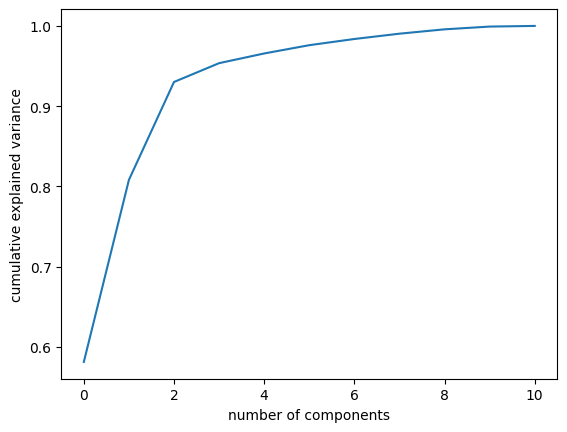

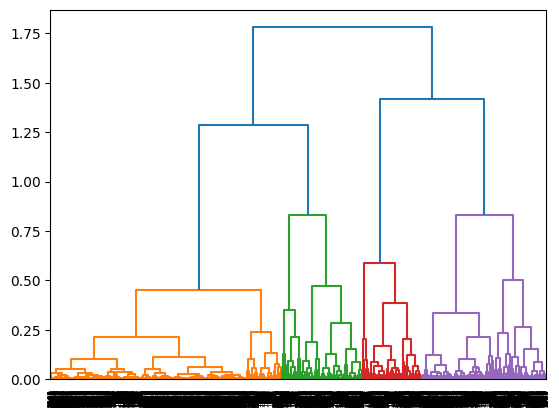

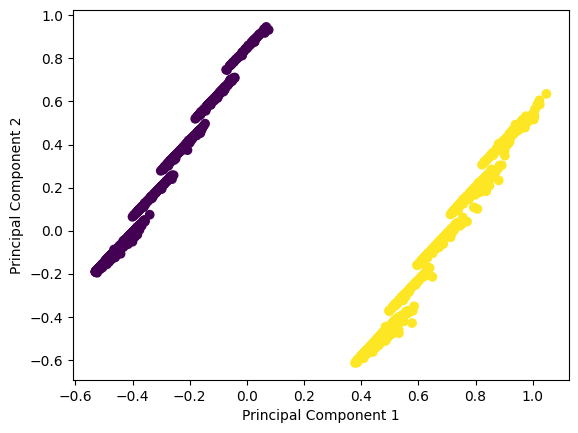

In [ ]:
#Hierarchical Clustering

from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics


# 1. Data Preprocessing
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/EEC189/HW3/EastWestAirlines.xlsx')

# Normalize the dataset
df = df.drop('ID#', axis=1)
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
plt.figure(figsize=(20, 6)) # change the size as per your requirement
sns.boxplot(data=data_norm)

# 2. Plot the dendrogram
plt.figure()
linked = linkage(data_norm, method='complete')
dendrogram1 = dendrogram(linked)
plt.show()

# 3. Apply Hierarchical Clustering to the dataset
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(data_norm)

# 4. PCA Variance Explained Plot
pca = PCA().fit(data_norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# 5. PCA Visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_norm)

# Plot the dendrogram on reduced dataset
linked = linkage(principalComponents, method='complete')
dendrogram1 = dendrogram(linked)
plt.show()

# Visualize clusters on the dataset in the reduced 2-dimensional PCA space
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#K-means Clustering



# K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

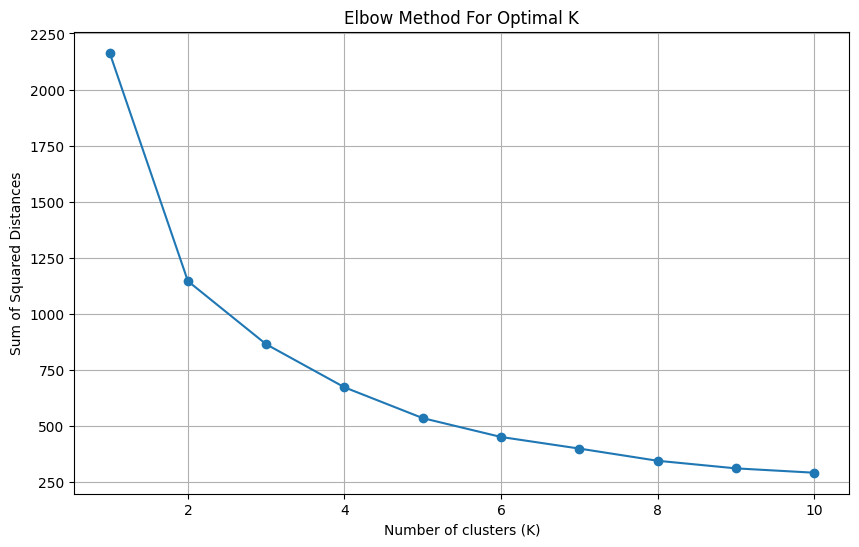

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


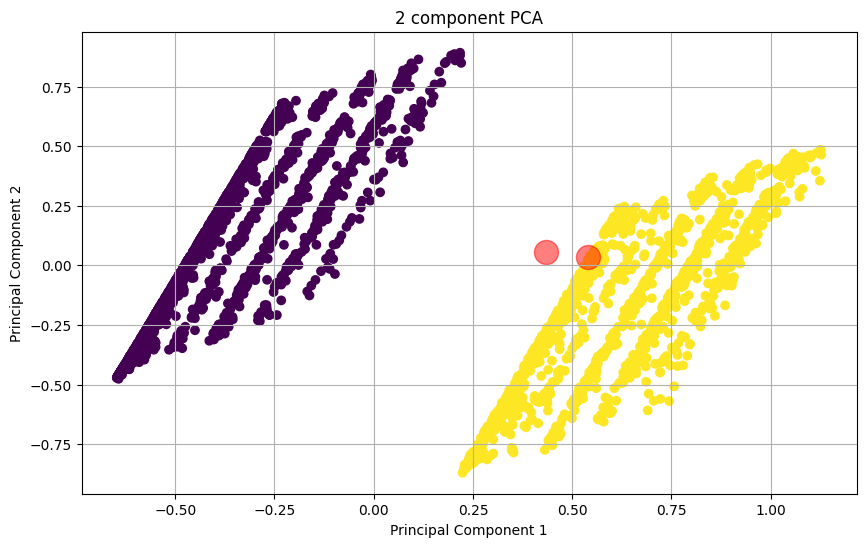

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/EEC189/HW3/EastWestAirlines.xlsx')

# Apply MinMax normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Elbow Graph Plotting
inertias = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_values, inertias, 'o-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

# Build clusters with K = 2
kmeans = KMeans(n_clusters=2, random_state=2)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# PCA Visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=300, alpha=0.5)  # plot centroids
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.grid(True)
plt.show()


# Naive Bayes Classification


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Data Preprocessing
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'Marital status', 'occupation', 
             'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary']
df = pd.read_csv(url, header=None, names=col_names)

# Step 2: Data Exploration
# Print the first few rows of the dataset
print(df.head())

# Step 3: Split Data into Training and Test Sets
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform necessary data transformations or feature engineering
# Impute missing categorical variables with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# One-hot encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_imputed)
X_test_encoded = encoder.transform(X_test_imputed)

# Step 5: Feature scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 6: Model Training
# Create an instance of the Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(X_train_scaled, y_train)

# Step 7: Use the trained classifier to predict the labels for the test data
y_pred = clf.predict(X_test_scaled)

# Step 8: Report classification metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_pred, average='weighted'))

# Step 9: Plot the ROC curve and calculate the AUC
y_prob = clf.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=clf.classes_[1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
pltshow()

# Step 10: Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Step 11: Class Probabilities
y_prob = clf.predict_proba(X_test_scaled)
print('Class probabilities:\n', y_prob)


# kNN

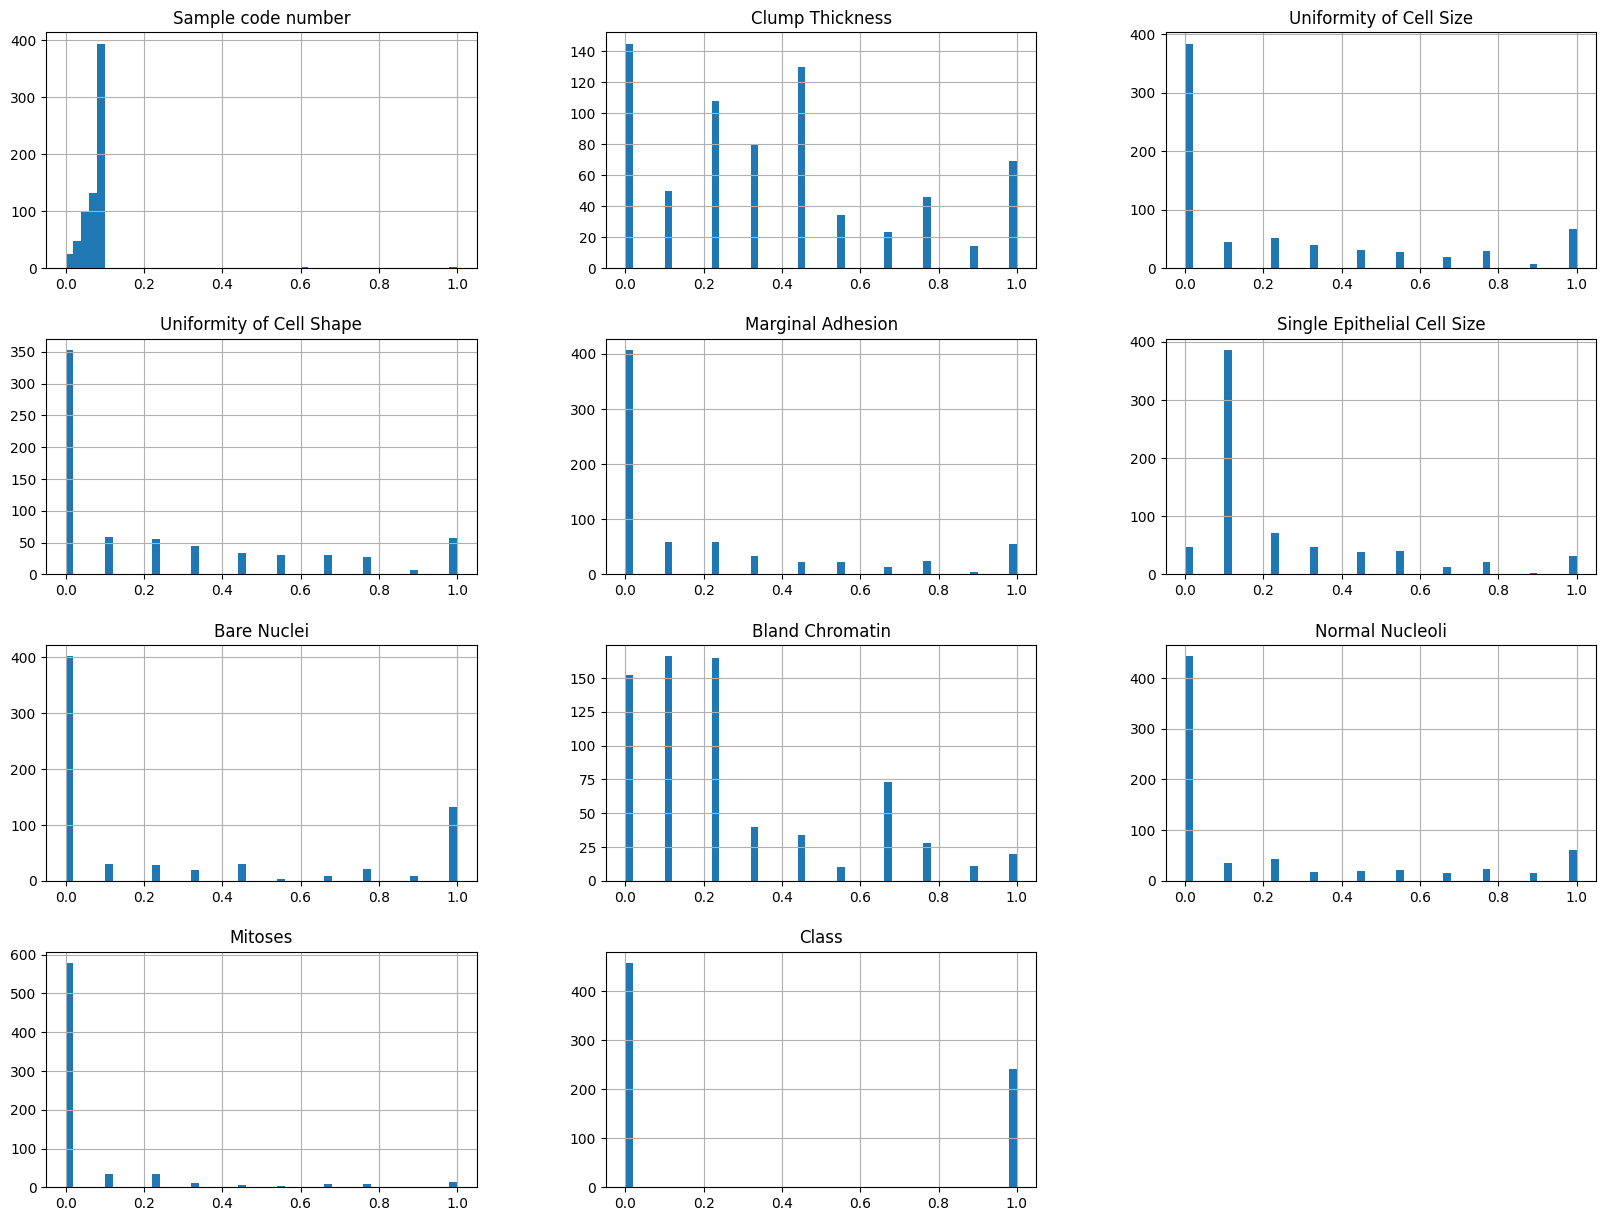

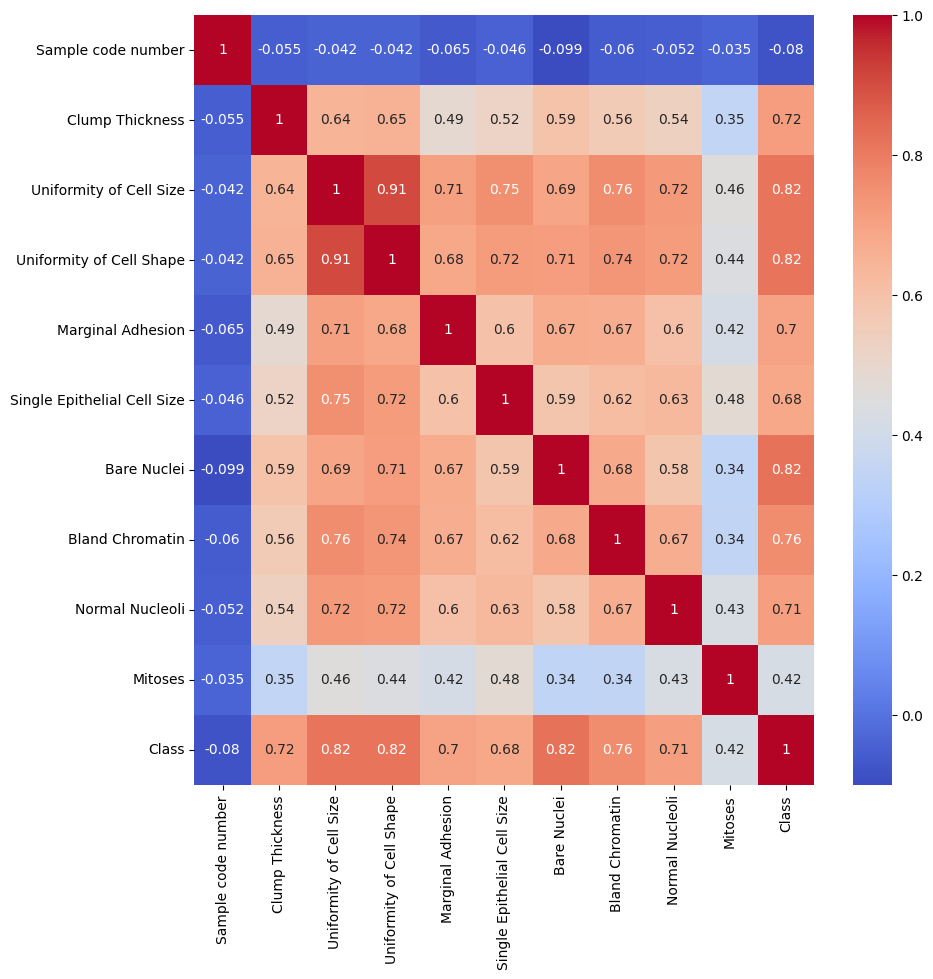

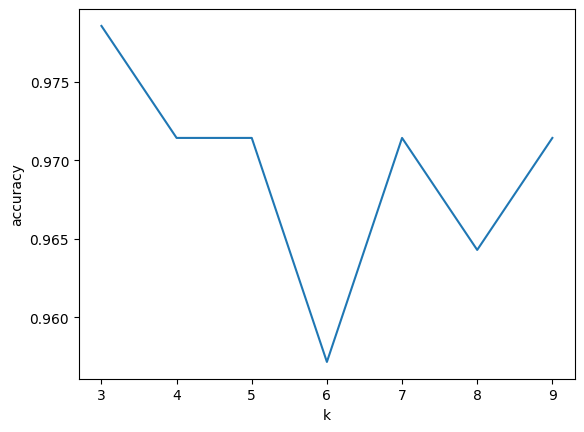

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        95
         1.0       0.98      0.96      0.97        45

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



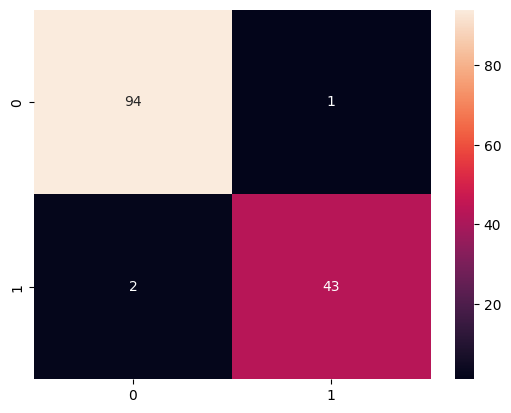

AUC: 0.982


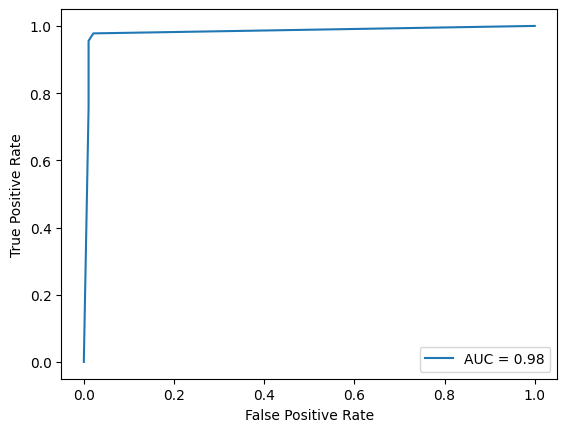

In [ ]:
#KNN

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve
from sklearn import metrics

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
                "Normal Nucleoli", "Mitoses", "Class"]
dfa = pd.read_csv(url, names=column_names, na_values="?")
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(dfa), columns=dfa.columns)

# Data visualization
df.hist(bins=50, figsize=(20,15))
plt.show()

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Split the data
X = df.drop("Class", axis=1)
y = df["Class"]

'''
for col in X.columns:
    X[col].fillna(X[col].median(), inplace=True)
'''

X.fillna(X.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Feature engineering
X_train['Bare Nuclei'].fillna(X_train['Bare Nuclei'].median(), inplace=True)
X_test['Bare Nuclei'].fillna(X_train['Bare Nuclei'].median(), inplace=True)
'''
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit kNN classification models
k_values = range(3,10)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]

# Calculate metrics for best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()


probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
roc_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % roc_auc)

# calculate roc curve
fpr, tpr,_= roc_curve(y_test, probs)

# plot the roc curve for the model
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


# SVM

0    0.908426
1    0.091574
Name: target_class, dtype: float64


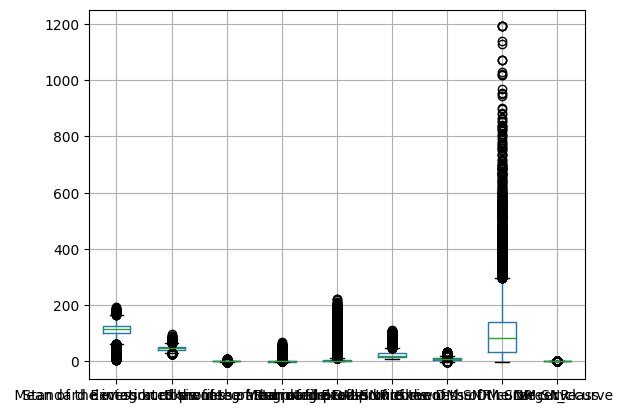

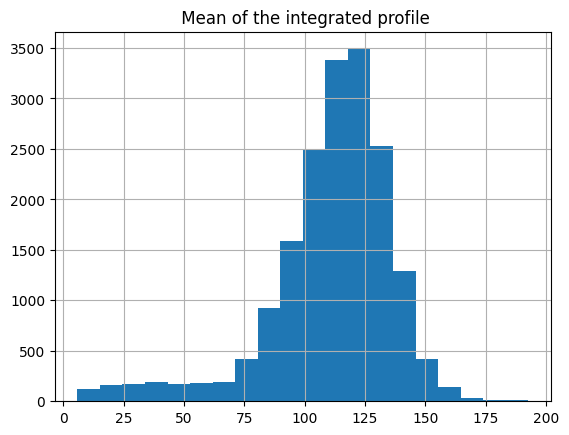

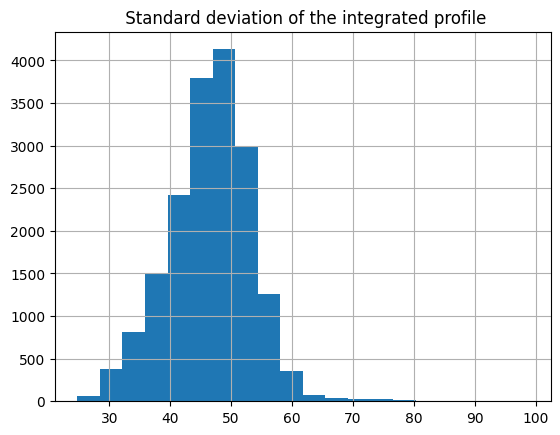

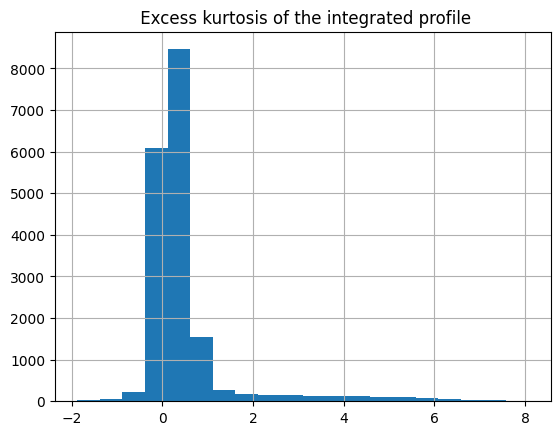

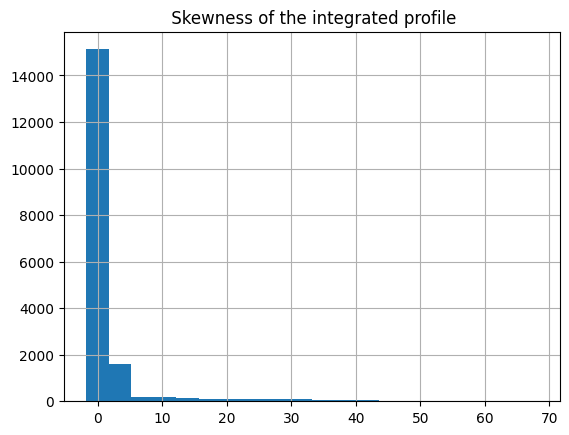

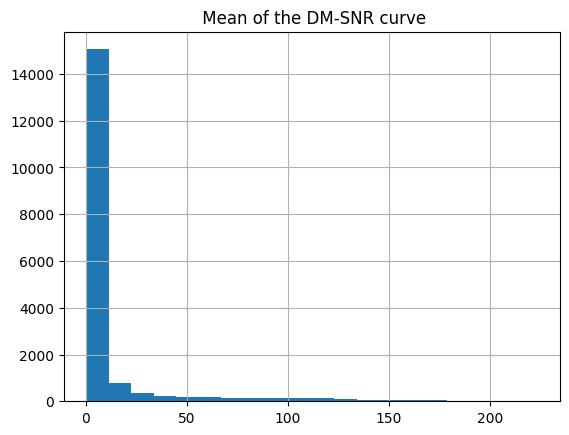

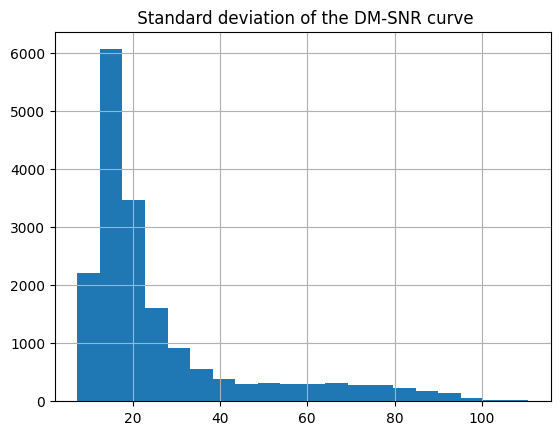

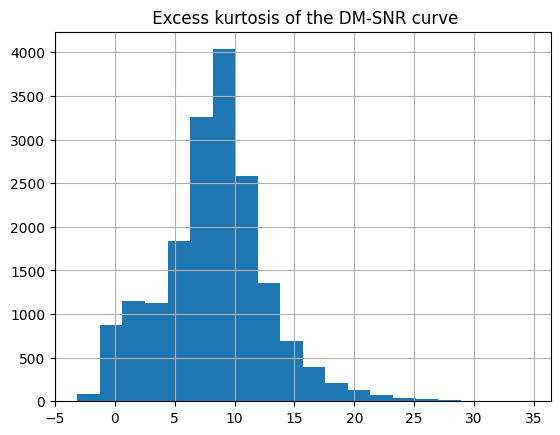

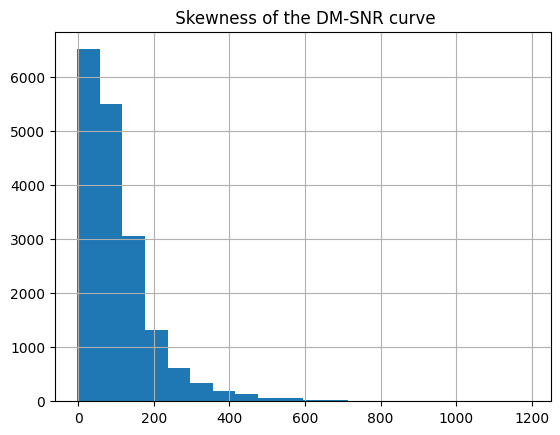

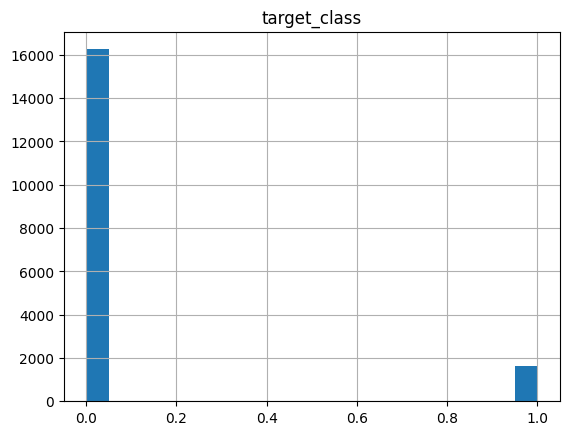

Kernel: rbf, C: 1, Accuracy: 0.979608938547486
Kernel: rbf, C: 10, Accuracy: 0.9804469273743017
Kernel: rbf, C: 100, Accuracy: 0.982122905027933
Kernel: linear, C: 1, Accuracy: 0.9787709497206704
Kernel: linear, C: 10, Accuracy: 0.979050279329609
Kernel: linear, C: 100, Accuracy: 0.979050279329609
Kernel: poly, C: 1, Accuracy: 0.9784916201117319
Kernel: poly, C: 10, Accuracy: 0.9804469273743017
Kernel: poly, C: 100, Accuracy: 0.9804469273743017
Kernel: sigmoid, C: 1, Accuracy: 0.8751396648044693
Kernel: sigmoid, C: 10, Accuracy: 0.8751396648044693
Kernel: sigmoid, C: 100, Accuracy: 0.8748603351955307
Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END ................C=1, kernel=linear;, score=0.978 total time=   0.3s
[CV 2/5] END ................C=1, kernel=linear;, score=0.980 total time=   0.3s
[CV 3/5] END ................C=1, kernel=linear;, score=0.977 total time=   0.3s
[CV 4/5] END ................C=1, kernel=linear;, score=0.983 total time=   0.3s
[CV 5

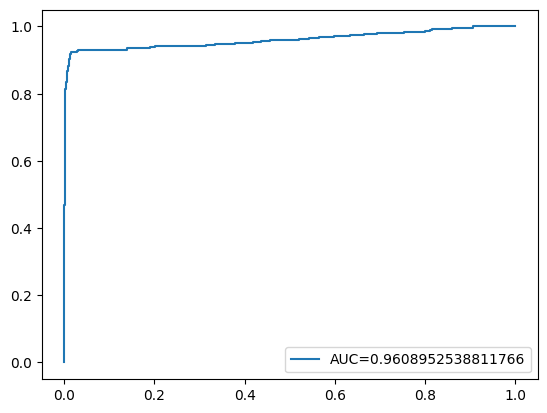

In [ ]:
# SVM

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

# 1. Load the dataset
df = pd.read_csv('/content/drive/MyDrive/EEC189/HW3/pulsar_stars.csv')

# 2. Perform exploratory data analysis
# Check the balance of the classes
print(df['target_class'].value_counts(normalize=True))

# Boxplots
df.boxplot(column=list(df.columns))
plt.show()

# Histograms
for col in df.columns:
    df[col].hist(bins=20)
    plt.title(col)
    plt.show()

# 3. Split the data
X = df.drop('target_class', axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Run SVM with different hyperparameters
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
Cs = [1, 10, 100]

for kernel in kernels:
    for C in Cs:
        clf = SVC(kernel=kernel, C=C)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    #    print("Kernel: {}, C: {}, Accuracy: {}".format(kernel, C, clf.score(X_test, y_test)))

# 6. Perform hyperparameter optimization using GridSearchCV
parameters = [{'C': [1, 5, 10, 20, 50, 100], 'kernel': ['linear']},
              {'C': [1, 5, 10, 20, 50, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
              {'C': [1, 5, 10, 20, 50, 100], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05]}]
              
grid = GridSearchCV(SVC(), parameters, refit=True, verbose=3)
grid.fit(X_train, y_train)
print("Best score: ", grid.best_score_)
print("Best parameters: ", grid.best_params_)

# 7. For the model with the optimized hyperparameters
clf_best = SVC(**grid.best_params_)
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_best)
print(conf_mat)

# ROC curve and AUC
y_pred_proba = clf_best.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Feed Forward Multilayer Perceptron

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the pulsar dataset
df = pd.read_csv('/content/drive/MyDrive/EEC189/HW3/pulsar_stars.csv')

# Split the data into features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the multilayer perceptron model
def build_classifier(l1, l2, l3, optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(l1, activation='relu', input_dim=df.shape[1] - 1))  # input layer
    classifier.add(Dense(l2, activation='relu'))  # hidden layer 1
    classifier.add(Dense(l3, activation='relu'))  # hidden layer 2
    classifier.add(Dense(1, activation='sigmoid'))  # output layer
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Hyperparameter optimization with GridSearchCV
classifier = KerasClassifier(build_fn=build_classifier)
parameters = {
    'l1': [8, 16],
    'l2': [8, 16],
    'l3': [8, 16],
    'optimizer': ['adam', 'sgd'],
    'batch_size': [10, 20],
}
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best score and parameters
print('Best score:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_)

# Train and evaluate the model with the optimized hyperparameters
best_params = grid_search.best_params_
classifier = build_classifier(best_params['l1'], best_params['l2'], best_params['l3'], best_params['optimizer'])
history = classifier.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=best_params['batch_size'])

# Plot accuracy and loss
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Predict test set and print classification metrics
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Redefine the model with dropout layers
def build_classifier_dropout(l1, l2, l3,optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(l1, activation='relu', input_dim=df.shape[1] - 1))  # input layer
    classifier.add(Dropout(0.1))  # dropout after input layer
    classifier.add(Dense(l2, activation='relu'))  # hidden layer 1
    classifier.add(Dropout(0.1))  # dropout after hidden layer 1
    classifier.add(Dense(l3, activation='relu'))  # hidden layer 2
    classifier.add(Dropout(0.1))  # dropout after hidden layer 2
    classifier.add(Dense(1, activation='sigmoid'))  # output layer
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

# Repeat the hyperparameter optimization, training, and evaluation with the new model
classifier_dropout = KerasClassifier(build_fn=build_classifier_dropout)
grid_search_dropout = GridSearchCV(estimator=classifier_dropout, param_grid=parameters, scoring='accuracy')
grid_search_dropout.fit(X_train, y_train)

# Print the best score and parameters
print('Best score with dropout:', grid_search_dropout.best_score_)
print('Best parameters with dropout:', grid_search_dropout.best_params_)

# Train and evaluate the model with the optimized hyperparameters
best_params_dropout = grid_search_dropout.best_params_
classifier_dropout = build_classifier_dropout(best_params_dropout['l1'], best_params_dropout['l2'], best_params_dropout['l3'], best_params_dropout['optimizer'])
history_dropout = classifier_dropout.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=best_params_dropout['batch_size'])

# Plot accuracy and loss
plt.figure(figsize=[8,6])
plt.plot(history_dropout.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_dropout.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves with Dropout',fontsize=16)

plt.figure(figsize=[8,6])
plt.plot(history_dropout.history['loss'],'r',linewidth=3.0)
plt.plot(history_dropout.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves with Dropout',fontsize=16)

# Predict test set and print classification metrics
y_pred_dropout = classifier_dropout.predict(X_test)
y_pred_dropout = (y_pred_dropout > 0.5)
print(classification_report(y_test, y_pred_dropout))
print(confusion_matrix(y_test, y_pred_dropout))


<ipython-input-28-855e8e8ee5c4>:31: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=build_classifier)


1432/1432 [==============================] - 8s 4ms/step - loss: 0.1093 - accuracy: 0.9693
Best score: 0.9731805524930875
Best parameters: {'batch_size': 10, 'l1': 16, 'l2': 16, 'l3': 16, 'optimizer': 'adam'}
Epoch 1/100
1146/1146 [==============================] - 7s 4ms/step - loss: 0.2287 - accuracy: 0.9610 - val_loss: 0.0943 - val_accuracy: 0.9728
Epoch 2/100
1146/1146 [==============================] - 6s 5ms/step - loss: 0.1047 - accuracy: 0.9714 - val_loss: 0.1042 - val_accuracy: 0.9728
Epoch 3/100
1146/1146 [==============================] - 5s 4ms/step - loss: 0.1006 - accuracy: 0.9730 - val_loss: 0.0972 - val_accuracy: 0.9710
Epoch 4/100
1146/1146 [==============================] - 5s 5ms/step - loss: 0.0986 - accuracy: 0.9734 - val_loss: 0.0897 - val_accuracy: 0.9738
Epoch 5/100
1146/1146 [==============================] - 5s 4ms/step - loss: 0.0943 - accuracy: 0.9743 - val_loss: 0.0888 - val_accuracy: 0.9738
Epoch 6/100
1146/1146 [==============================] - 5s 4ms/st

<ipython-input-28-855e8e8ee5c4>:88: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier_dropout = KerasClassifier(build_fn=build_classifier_dropout)


90/90 [==============================] - 0s 2ms/step
